### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Graphs and Graph Theory

# Lecture 7: Shortest Paths? Breadth First Search!

In [1]:
import networkx as nx
opts = { "with_labels": True, "node_color": 'y' }

## Graph Traversal

### Depth First Search

[DFS](https://en.wikipedia.org/wiki/Depth-first_search)
and [BFS](https://en.wikipedia.org/wiki/Breadth-first_search)
are simple but efficient tree (and graph) traversal algorithms.

**DFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $S \gets (x)$
* while $S \neq \emptyset$:
* &nbsp; $y \gets S$.pop()
* &nbsp; visit($y$)
* &nbsp; $S$.push($y$.children)

Here $S$ is a [**stack**](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)) (LIFO):
$S$.pop() yields the **newest** entry.

In [2]:
n = 10
T = nx.random_tree(n)
nx.draw(T, **opts)

In [3]:
TT = T.copy()
x = 0
stack = [x]
while len(stack) > 0:
    y = stack.pop()
    stack.extend(TT[y])
    TT.remove_node(y)
    print(y, stack)


0 [5]
5 [1, 4]
4 [1, 2, 7, 8]
8 [1, 2, 7]
7 [1, 2, 6]
6 [1, 2]
2 [1, 9]
9 [1]
1 [3]
3 []


### Breadth First Search

**BFS**: Given a rooted tree $T$ with root $x$, visit all nodes in the tree.
* $Q \gets (x)$
* while $Q \neq \emptyset$:
* &nbsp; $y \gets Q$.pop() 
* &nbsp; visit($y$) 
* &nbsp; $Q$.push($y$.children)

Here, $Q$ is a [**queue**](https://en.wikipedia.org/wiki/Queue_(abstract_data_type)) (FIFO):
$Q$.pop() yields the **oldest** entry.

In [4]:
TT = T.copy()
x = 0
queue = [x]
while len(queue) > 0:
    y = queue.pop(0)
    queue.extend(TT[y])
    TT.remove_node(y)
    print(y, queue)

0 [5]
5 [1, 4]
1 [4, 3]
4 [3, 2, 7, 8]
3 [2, 7, 8]
2 [7, 8, 9]
7 [8, 9, 6]
8 [9, 6]
9 [6]
6 []


### Alternative Implementations

Both DFS and BFS are more like strategies, rather than specific algorithms.
Different problems might require different implementations.
Sometimes, the stack, or the queue don't have to be made explicit:

* In a recursive implementation, DFS can make use of the (`python`) interpreters
  function call stack.
  
* BFS can take advantage of the fact that some types of lists in a `python` `for` loop
  are largely organized as lists.


* DFS on a tree:

In [5]:
def dfs(tree, x):
    print(x, end=', ')
    tree.nodes[x]['seen'] = True
    for z in tree[x]:
        if not tree.nodes[z]['seen']:
            dfs(tree, z)    

In [6]:
TT = T.copy()
for x in TT:
    TT.nodes[x]['seen'] = False

In [7]:
dfs(TT, 0)

0, 5, 1, 3, 4, 2, 9, 7, 6, 8, 

* BFS on a tree:

In [8]:
TT = T.copy()
for x in TT:
    TT.nodes[x]['seen'] = False

Q = [0]
TT.nodes[0]['seen'] = True
for y in Q:
    print(y, end=', ')
    for z in TT[y]:
        if not TT.nodes[z]['seen']:
            Q.append(z)
            TT.nodes[z]['seen'] = True


0, 5, 1, 4, 3, 2, 7, 8, 9, 6, 

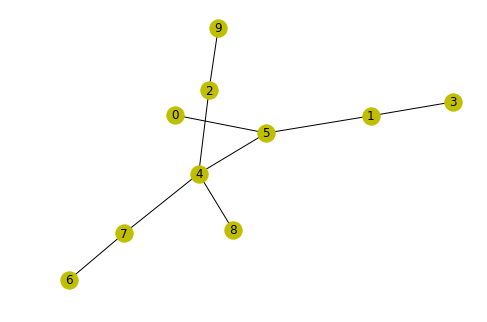

In [9]:
nx.draw(T, **opts)

## Shortest Paths

* Recall that a __path__ in a network $G = (X, E)$
is a sequence $p = (x_0, x_1, \dots, x_k)$ of
nodes $x_i \in X$, $i = 0, \dots, k$, such that any
pair of consecutive nodes forms an edge in $G$, i.e.,
$\{x_{i-1}, x_i\} \in E$ for all $i = 1, \dots, k$.

* The __length__ $l(p)$ of the path $p$ is the
number of edges, $l(p) = k$.

* In many practical applications it is of interest to find
for a pair $x, y$ of nodes, one or all the paths form $x$ to $y$
connecting the two nodes with the fewest number of edges possible.

* This is a more complex measure on a network than, say, the degree
of a node, and  we will need a more complex procedure, that is: an
algorithm, in order to answer such questions systematically.
Let's start with a proper definition.

<div class="alert alert-danger">

**Definition.** Let $G = (X, E)$ be a simple graph and let
$x, y \in X$.  Let $P(x, y)$ be the set of all paths from $x$ to $y$.
Then the __distance__ $d(x, y)$ from $x$ to $y$ is
$$d(x, y) = \min \{ l(p) : p \in P(x, y) \},$$
the shortest possible length of a path from $x$ to $y$, and a __shortest path__ from $x$ to $y$ is a path $p \in P(x, y)$ of length $l(p) = d(x, y)$.

The __diameter__ $\mathrm{diam}(G)$ of the network $G$ is the length of the longest shortest path between any two nodes,
$$\mathrm{diam}(G) = \max \{ d(x, y) : x, y \in X \}.$$
</div>

### Breadth First Search for Distance

* Now we consider the following problem: Given a node $x \in X$, what
are the distances $d(x, y)$ for all nodes $y \in X$?  

* BFS provides a systematic
procedure for finding these distances, and the shortest paths through
which they are realized.

In order to describe the algorithm step by step, let's call a node $y$
a __neighbor__ of node $x$, if $\{x, y\}$ is an
edge, and let's denote by
$$N(x) = \{ y \in X : \{x, y\} \in E \}$$
the set of all neighbors of node $x$.  The algorithm works through the
network **layer by layer**, starting with the given vertex $x$ at layer
$0$ and all its friends at layer $1$. It then finds the friends of the
friends at layer $2$, and so on, until every node that can be reached
from $x$ by a path has been recorded, taking care that no node gets
recorded twice.  The layer of a node then corresponds to its distance
from the given node $x$.

In practice, as in the following example, the layer does not
need to be made explicit.

In [10]:
G = nx.read_adjlist("data/bfs.adj")

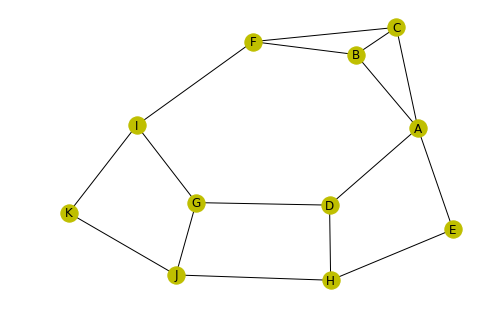

In [11]:
nx.draw(G, **opts)

In [12]:
for x in G: 
    G.nodes[x]['seen'] = False

In [13]:
G.nodes['A']

{'seen': False}

In [14]:
seen = []

In [15]:
seen.append('A')
G.nodes['A']['seen'] = True
seen

['A']

In [16]:
list(G.neighbors('A'))

['B', 'C', 'D', 'E']

In [17]:
for x in G.neighbors('A'):
    seen.append(x)
    G.nodes[x]['seen'] = True

In [18]:
seen

['A', 'B', 'C', 'D', 'E']

In [19]:
node = 'B'
for x in G.neighbors(node):
    if not G.nodes[x]['seen']:
        seen.append(x)
        G.nodes[x]['seen'] = True
seen

['A', 'B', 'C', 'D', 'E', 'F']

In [20]:
node = 'C'
for x in G.neighbors(node):
    if not G.nodes[x]['seen']:
        seen.append(x)
        G.nodes[x]['seen'] = True
seen

['A', 'B', 'C', 'D', 'E', 'F']

... and so on, until there are no more nodes to be processed.

When this process is formulated as an algorithm, we use a __queue__
(a first-in first-out buffer) to keep track of the node
whose neighbors are currently under consideration.
A queue is an array of values that comes with two basic operations:
* one can __push__ a value to the end of the queue, and
* one can __pop__ a value off the top of the queue (provided
the queue is not empty).

It can be shown that this version of the algorithm
in the common case of a sparse network
has complexity $O(n)$, which is as good as one could hope for.

<div class="alert">

**Breadth First Search.**
Given a simple graph
$G = (X, E)$ and a vertex $x \in X$,
determine $d(x, y)$ for all nodes $y \in X$.

1. [Initialize.]  Suppose that $X = \{x_0, x_1, \ldots, x_{n-1}\}$
and that $x = x_j$.  Set $d_i \gets \perp$ (undefined) for $i = 0, \dots, n{-}1$.
Set $d_j \gets 0$ and initialize a queue $Q \gets (x_j)$.

2. [Loop.] While $Q \neq \emptyset$:
   * pop node $x_k$ off $Q$
   * for each neighbor $x_l$ of $x_k$ with $d_l = \perp$:
       * push $x_l$ onto $Q$ and set $d_l \gets d_k + 1$.

3. [Stop.] Return the array $(d_0, \dots, d_{n-1})$.

</div>

In [21]:
from queue import Queue

In [22]:
for x in G: 
    G.nodes[x]['d'] = -1 # undefined

x = 'B'
G.nodes[x]['d'] = 0
q = Queue()
q.put(x)

In [23]:
list(q.queue)

['B']

In [24]:
while not q.empty():
    x = q.get()
    for y in G.neighbors(x):
        if G.nodes[y]['d'] < 0: # undefined?
            G.nodes[y]['d'] = G.nodes[x]['d'] + 1
            q.put(y)
    print(x, ": ", list(q.queue))

B :  ['A', 'C', 'F']
A :  ['C', 'F', 'D', 'E']
C :  ['F', 'D', 'E']
F :  ['D', 'E', 'I']
D :  ['E', 'I', 'G', 'H']
E :  ['I', 'G', 'H']
I :  ['G', 'H', 'K']
G :  ['H', 'K', 'J']
H :  ['K', 'J']
K :  ['J']
J :  []


In [25]:
print([G.nodes[x]['d'] for x in G])

[1, 0, 1, 2, 2, 1, 3, 3, 2, 4, 3]


In [26]:
print(list(G.nodes.data('d')))

[('A', 1), ('B', 0), ('C', 1), ('D', 2), ('E', 2), ('F', 1), ('G', 3), ('H', 3), ('I', 2), ('J', 4), ('K', 3)]


**Variants.**
BFS is an extremely versatile algorithm, which applies in many different
situations and can be adapted to produce additional information
on a network.

For example, BFS run on a node $x$ in a network $G = (X, E)$
determines the __connected component__ of $X$ in $G$
(as the set of all nodes that get a distance value assigned).

With little more work (and an additional array) BFS can produce
a __spanning tree__ (or __shortest path tree__).
Here, whenever node $x_l$ is pushed onto $Q$, it is assigned
the current node $x_k$ (in the additional array)
as its predecessor on a shortest path from $x_j$ to $x_l$.
The subgraph of the network consisting of these edges is a tree.
As a tree, it has exactly one path between the given node $x$
and any of its
vertices $y$ and, by construction, this path is a shortest path
between $x$ and $y$.


In [27]:
for x in G: 
    G.nodes[x]['d'] = -1 # undefined

x = 'A'
G.nodes[x]['d'] = 0
q = Queue()
q.put(x)

for e in G.edges:
    G.edges[e]['seen'] = False

In [28]:
print(list(G.edges.data()))

[('A', 'B', {'seen': False}), ('A', 'C', {'seen': False}), ('A', 'D', {'seen': False}), ('A', 'E', {'seen': False}), ('B', 'C', {'seen': False}), ('B', 'F', {'seen': False}), ('C', 'F', {'seen': False}), ('D', 'G', {'seen': False}), ('D', 'H', {'seen': False}), ('E', 'H', {'seen': False}), ('F', 'I', {'seen': False}), ('G', 'I', {'seen': False}), ('G', 'J', {'seen': False}), ('H', 'J', {'seen': False}), ('I', 'K', {'seen': False}), ('J', 'K', {'seen': False})]


In [29]:
while not q.empty():
    x = q.get()
    for y in G.neighbors(x):
        if G.nodes[y]['d'] < 0: # undefined?
            G.nodes[y]['d'] = G.nodes[x]['d'] + 1
            q.put(y)
            G.edges[x, y]['seen'] = True
    print(x, ": ", list(q.queue))

A :  ['B', 'C', 'D', 'E']
B :  ['C', 'D', 'E', 'F']
C :  ['D', 'E', 'F']
D :  ['E', 'F', 'G', 'H']
E :  ['F', 'G', 'H']
F :  ['G', 'H', 'I']
G :  ['H', 'I', 'J']
H :  ['I', 'J']
I :  ['J', 'K']
J :  ['K']
K :  []


In [30]:
sub = [e for e in G.edges if G.edges[e]['seen']]

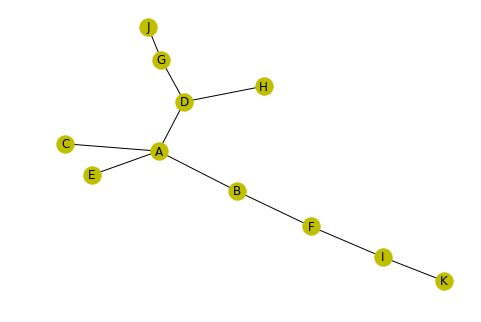

In [31]:
nx.draw(G.edge_subgraph(sub), **opts)

Or, one could highlight the spanning tree inside the graph by using, say,
red as color for the spanning edges (and blue for the rest).

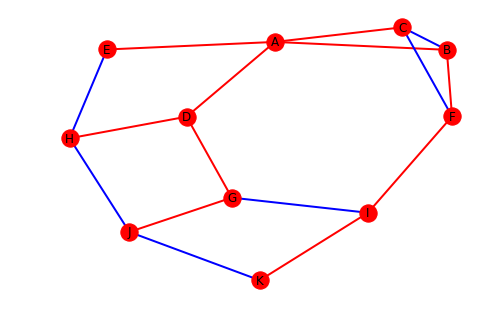

In [32]:
colors = ['red' if G.edges[e]['seen'] else 'blue' for e in G.edges]
nx.draw(G, edge_color = colors, with_labels = True, width=2.0)

Of course, in order to find distances, or shortest paths
between **all pairs** of nodes $x$ and $y$ in a network, one can
perform BFS for each of the vertices $x \in X$ in turn.

The algorithm and its variants also works on directed networks,
but the results then will have to be interpreted in the context of
directed networks.

More about BFS can be found in [Newman, Section 10.3].

And in the next lecture.


##  Code Corner

### `queue`

* `Queue`: [[doc]](https://docs.python.org/3/library/queue.html)

### `networkx`

* `remove_node`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.remove_node.html)


* `edge_subgraph`: [[doc]](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html)

## Exercises.

1. Compute the distances $d(x, y)$ for all vertices $x$ and $y$ in the above graph `G`. 
1. Hence determine the diameter $\mathrm{diam}(G)$.
1. Construct a (simple) graph $H$ with edges 
<pre>
    1-9, 9-3, 9-12, 9-15, 9-2, 9-13, 5-11, 5-14, 5-3, 11-14, 
    11-4, 14-12, 14-4, 12-15, 15-7, 2-6, 2-7, 13-10, 4-7, 7-8
</pre>
1. Using BFS, construct a spanning tree of $H$, starting with vertex $1$.
1. Compute a matrix $D= (d_{ij})$ with entries
$$
d_{ij} = d(i, j),
$$
the distance between nodes $i$ and $j$ in $H$.